# Assignment 2 (10 Marks)

Please submit this file only.

Name: Sohan Hossain

Student ID:  169021529

## Question 1

Please use this same dataset as in Assignment 1 for the following plot:

Visualize the time series for Regular Unleaded Gasoline prices in Ottawa from 2000 to 2023. Smooth the time series using a simple moving average with a window size of 40. Plot both the original time series and its trend in one plot.

Your visualization should be complete.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/energy-price.csv')

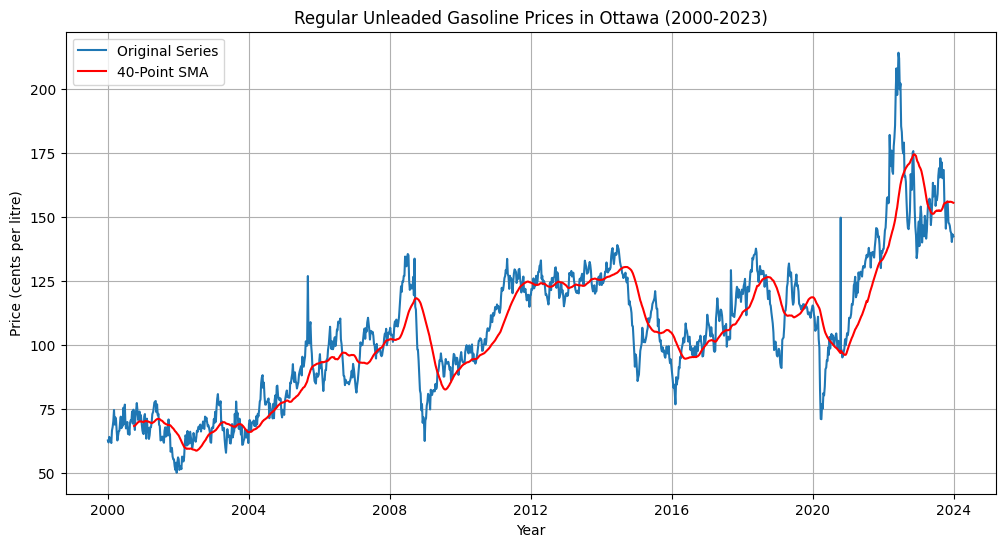

In [22]:
# write your code here
df['Date'] = pd.to_datetime(df['Date'])
df_filtered = df[(df['Date'] >= '2000-01-01') & (df['Date'] <= '2023-12-31') & (data['Fuel Type'] == "Regular Unleaded Gasoline")].sort_values(by='Date').copy()

df_filtered['SMA_40'] = df_filtered['Ottawa'].rolling(window=40).mean()

plt.figure(figsize=(12, 6))
plt.plot(df_filtered['Date'], df_filtered['Ottawa'], label='Original Series')
plt.plot(df_filtered['Date'], df_filtered['SMA_40'], label='40-Point SMA', color='red')
plt.title('Regular Unleaded Gasoline Prices in Ottawa (2000-2023)')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


## Question 2

Please plot a map of Canada showing the volcanoes and earthquakes, with the earthquakes' magnitude represented by color. Your visualization should be complete.

Data sources:
https://github.com/plotly/datasets/blob/master/volcano_db.csv
https://earthquakescanada.nrcan.gc.ca/stndon/NEDB-BNDS/bulletin-en.php

In [47]:
import pandas as pd
import geopandas as gpd

## volcanoes in the world
volcano = pd.read_csv('data/volcano_db.csv', encoding = "ISO-8859-1")
## world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
## earthquakes in Canada
earthquake = pd.read_csv('data/earthquake.txt',sep='|')


/var/folders/0c/cxsmtwm95h74gztvdhmp_m0r0000gn/T/ipykernel_14635/3709332631.py:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


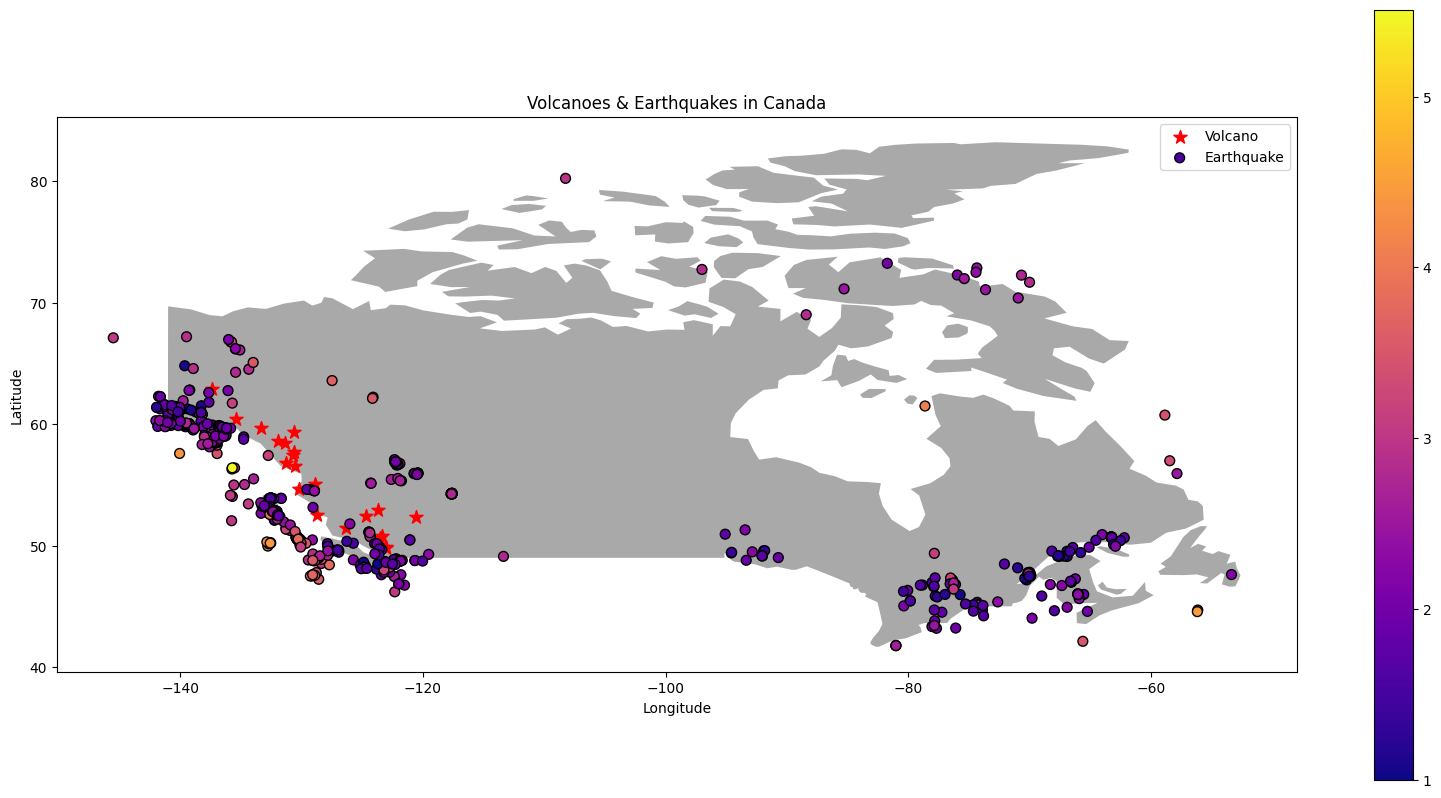

In [49]:
# write your code here
canada = world[world.name == 'Canada']
canada_v = volcano[volcano['Country'] == 'Canada']
vp = gpd.GeoDataFrame(canada_v, geometry=gpd.points_from_xy(canada_v.Longitude, canada_v.Latitude))
ep = gpd.GeoDataFrame(earthquake, geometry=gpd.points_from_xy(earthquake.Longitude, earthquake.Latitude))

ax = canada.plot(figsize=(20, 10), color='darkgrey')  
vp.plot(ax=ax, color='red', marker='*', markersize=100, label='Volcano')  
ep.plot(ax=ax, column='Magnitude', cmap='plasma', legend=True, label='Earthquake', markersize=50, edgecolor='black')  
plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Volcanoes & Earthquakes in Canada')
plt.show()